## Adding the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


[nltk_data] Downloading package vader_lexicon to C:\Users\Tee Chang
[nltk_data]     Zen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading cleaned_news_data csv

In [3]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_news_data.csv')

## Exploring the dataset

In [25]:
# Check the balance between real and fake news articles
balance = data['label'].value_counts()
print("Number of fake news articles:", balance[0])
print("Number of real news articles:", balance[1])

Number of fake news articles: 22850
Number of real news articles: 21416


#### We can see that the dataset is balanced

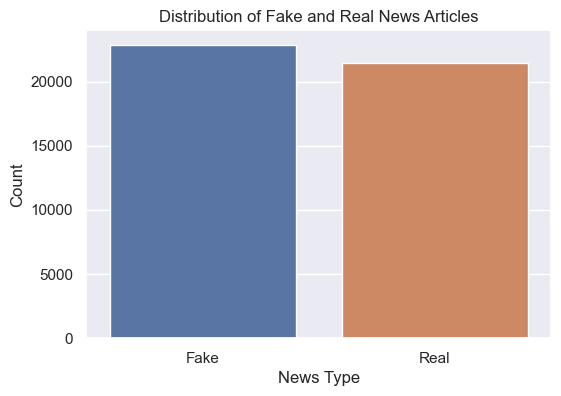

In [26]:
# Visualize the balance between real and fake news articles
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title('Distribution of Fake and Real News Articles')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

## Checking for nan Values

In [27]:
data.isna().sum()

title           0
text            0
subject         0
date           10
label           0
title_clean     0
text_clean      0
year           10
month          10
dtype: int64

#### no nan Values present

## Number of data points 

In [28]:
data.title.count()

44266

In [29]:
data.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6432
left-news           4309
Government News     1498
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Distribution of subjects

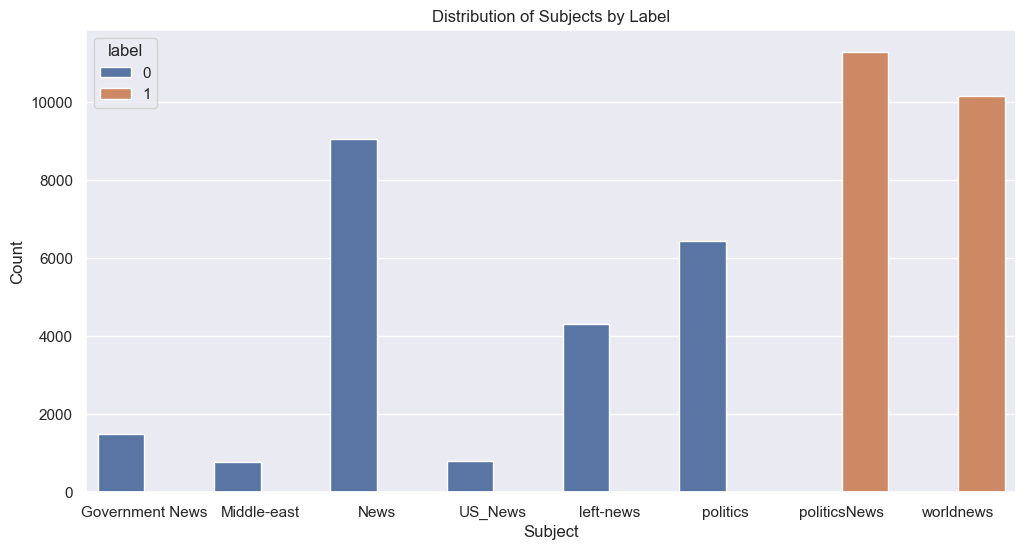

0    22850
1    21416
Name: label, dtype: int64


In [30]:
# Distribution of subjects by label
subject_label_count = data.groupby(['subject', 'label']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='subject', y='count', hue='label', data=subject_label_count)
plt.title('Distribution of Subjects by Label')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()     
print(data['label'].value_counts())

#### Since the topics in subject column are different for both categories, 
#### 'subject' will not be included in the input for our models in the Machine Learning and Alogorithm Opitmisation Stage

## Generate word cloud for 'title_clean'

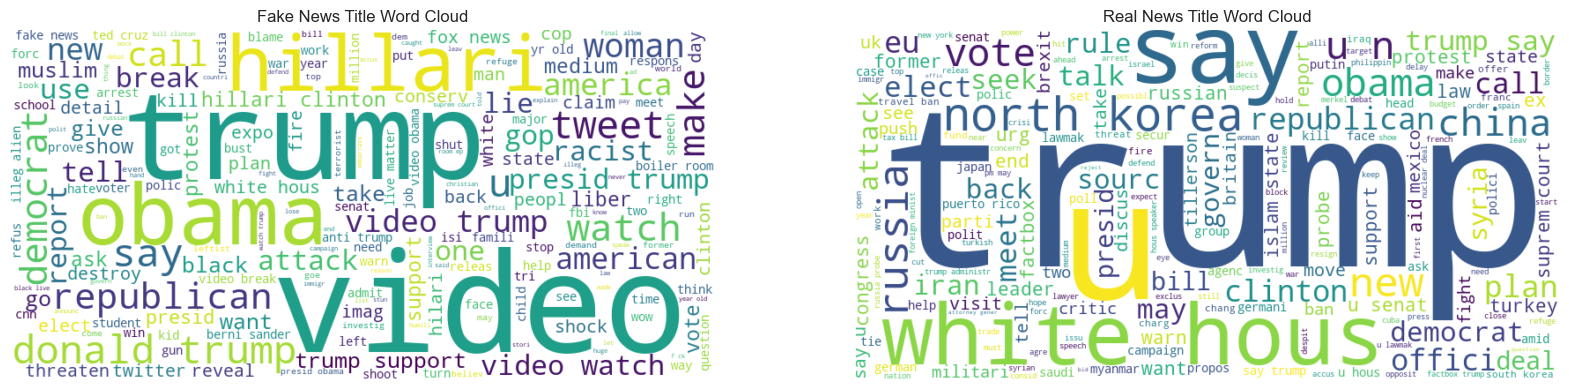

In [31]:
from wordcloud import WordCloud,STOPWORDS
# Create word clouds for fake and real news articles
fake_news = ' '.join(data[data['label'] == 0]['title_clean'])
real_news = ' '.join(data[data['label'] == 1]['title_clean'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)

# Visualize word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.imshow(wordcloud_fake, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Fake News Title Word Cloud')
ax2.imshow(wordcloud_real, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Real News Title Word Cloud')
plt.show()


#### The word cloud for fake news titles and real new titles both tend to use sensational or attention-grabbing words such as "trump," "obama," and "hillari(y).". Presumably, the aim is to capture readers attention... 

## Most common words for title_clean

In [55]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus_title = get_corpus(data.title_clean)
corpus_title[:5]

from collections import Counter
counter = Counter(corpus_title)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'trump': 14688,
 'video': 8061,
 'u': 5869,
 'say': 4116,
 'obama': 3190,
 'hillari': 2296,
 'hous': 2048,
 'watch': 1977,
 'presid': 1881,
 'republican': 1833}

#### The top 10 most common words in titles include words like "trump" "video" and "u" for both fake and real news. This highlights the importance of politics and current events in news headlines.

## Generate word cloud for 'text_clean'

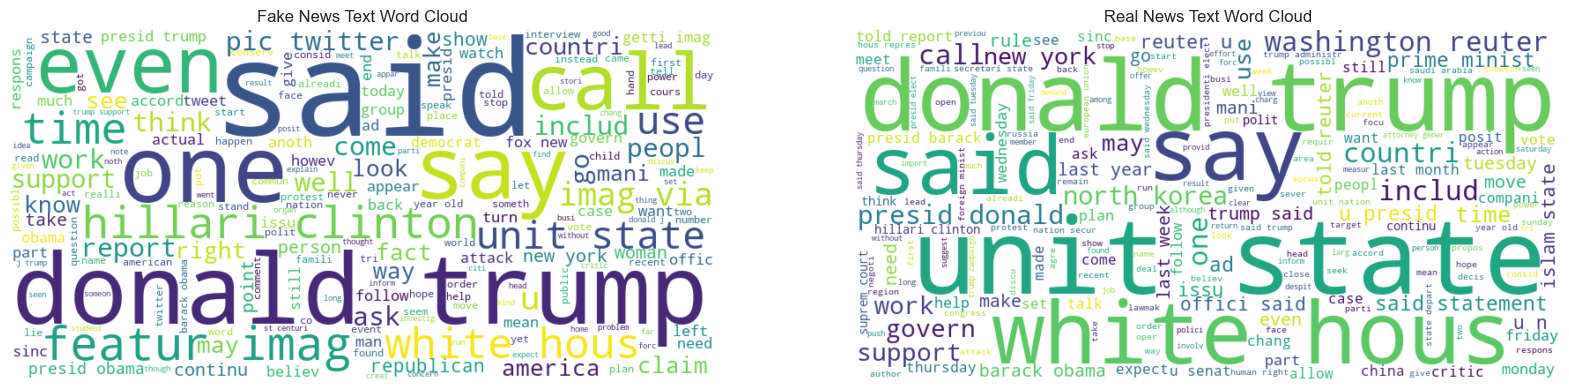

In [32]:
# Create word clouds for fake and real news articles
fake_news = ' '.join(str(text) for text in data[data['label'] == 0]['text_clean'])
real_news = ' '.join(str(text) for text in data[data['label'] == 1]['text_clean'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)

# Visualize word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.imshow(wordcloud_fake, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Fake News Text Word Cloud')
ax2.imshow(wordcloud_real, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Real News Text Word Cloud')
plt.show()


#### The word cloud for fake news article texts shows that they contain a mix of sensational words and politically charged terms. Real news texts have a more diverse vocabulary and seem to cover a wider range of topics.

## Most common word for text_clean

In [56]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus_text = get_corpus(data.text_clean)
corpus_text[:5]

from collections import Counter
counter = Counter(corpus_text)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'trump': 134893,
 'said': 132825,
 'u': 71957,
 'state': 63399,
 'presid': 60529,
 'would': 55171,
 'peopl': 42034,
 'year': 41696,
 'republican': 39775,
 'one': 39201}

#### The top 10 most common words in texts show a similar pattern to the titles, with words like "trump" and "u" being prominent in both fake and real news articles.

## Number of characters in 'text_clean' and 'title_clean'

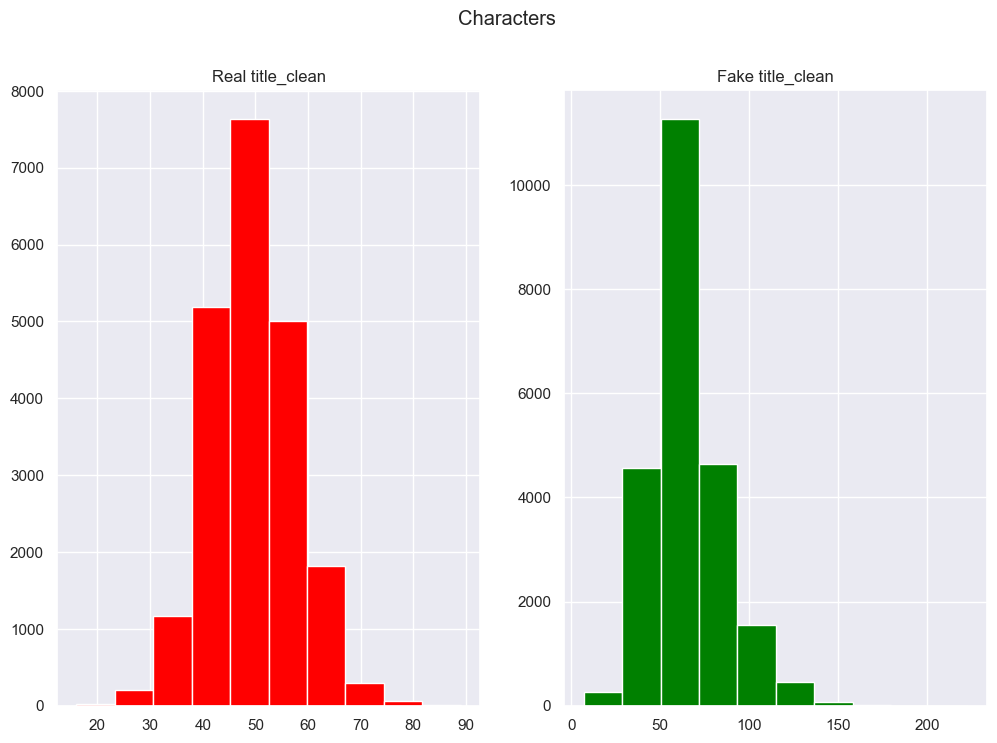

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['label']==1]['title_clean'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Real title_clean')
text_len=data[data['label']==0]['title_clean'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake title_clean')
fig.suptitle('Characters')
plt.show()

#### Titles: Fake news titles tend to have a longer character count, highest frequency is 60, compared to real news titles, highest frequency is 50. This could be due to the use of sensational language or clickbait-style headlines in fake news articles.

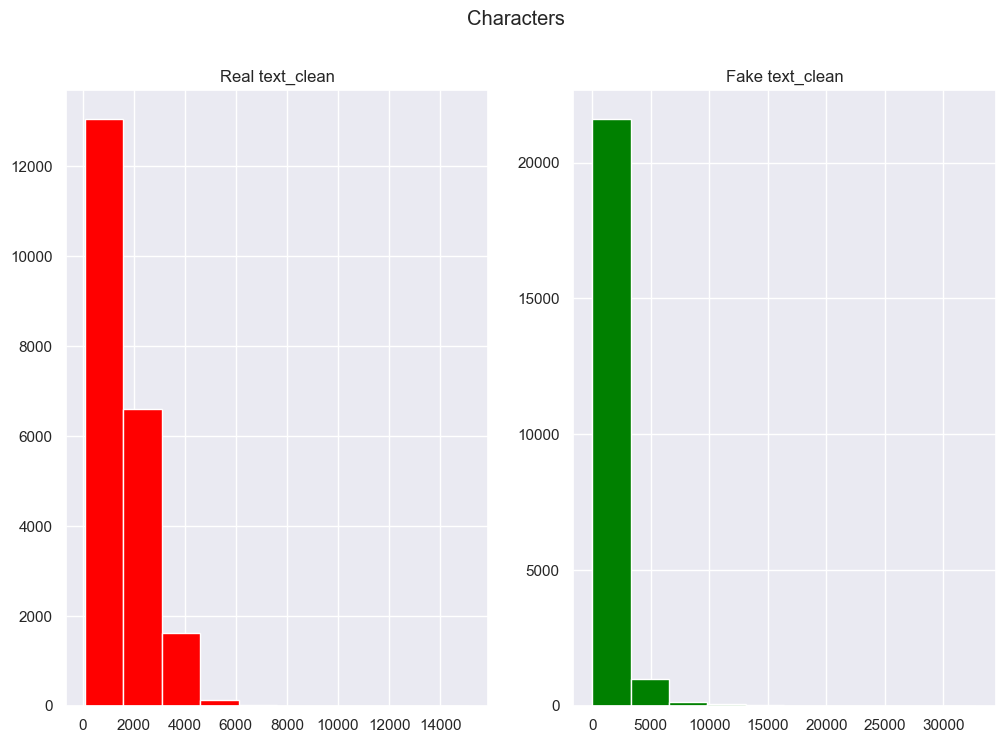

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['label']==1]['text_clean'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Real text_clean')
text_len=data[data['label']==0]['text_clean'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text_clean')
fig.suptitle('Characters')
plt.show()

#### The distribution of both seems to be a bit different. 2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.

## Number of words in 'text_clean' and 'title_clean'

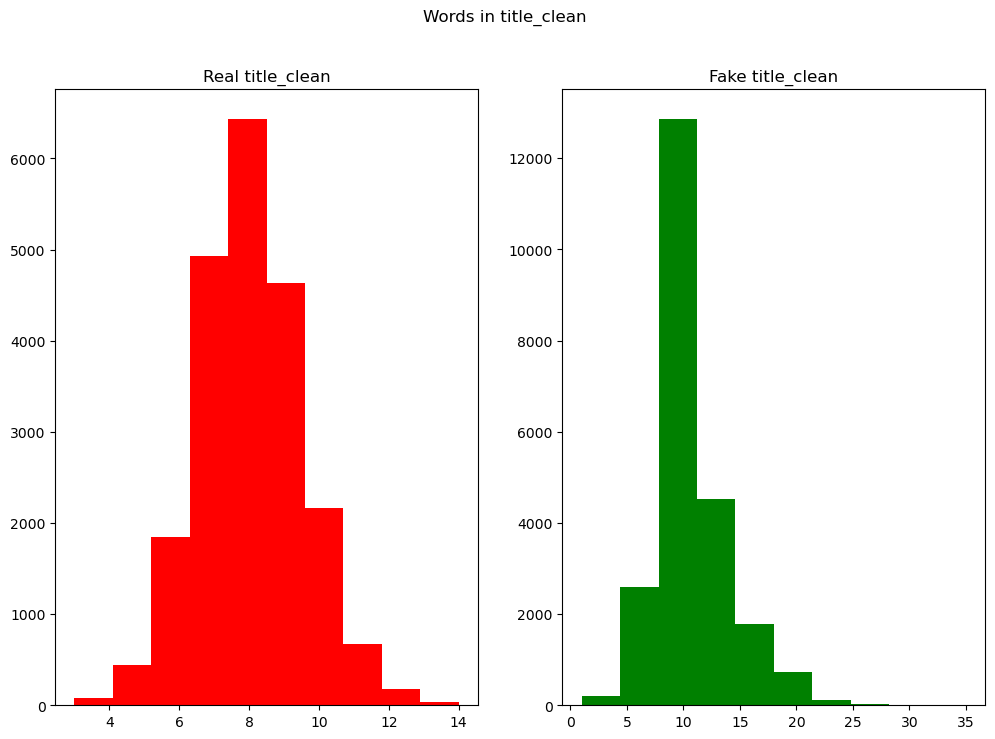

In [9]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['label']==1]['title_clean'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Real title_clean')
text_len=data[data['label']==0]['title_clean'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake title_clean')
fig.suptitle('Words in title_clean')
plt.show()

#### Titles: Fake news titles tend to have a longer character count, highest frequency is 10, compared to Real news titles, highest frequency is 8. This could be due to the use of sensational language or clickbait-style headlines in fake news articles.

In [37]:
float_rows = data[data['text_clean'].apply(lambda x: isinstance(x, float))]
print(float_rows)

Empty DataFrame
Columns: [title, text, subject, date, label, title_clean, text_clean, year, month, word_count]
Index: []


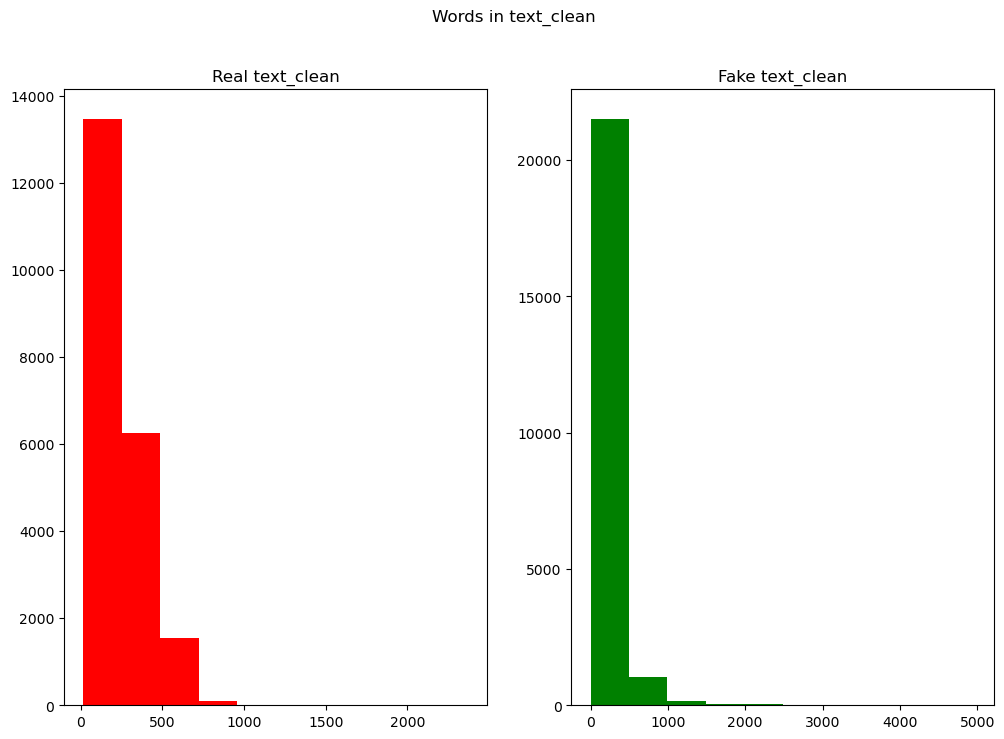

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['label']==1]['text_clean'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Real text_clean')
text_len=data[data['label']==0]['text_clean'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text_clean')
fig.suptitle('Words in text_clean')
plt.show()

#### There is a noticeable difference in the word count of fake and real news texts, with fake news articles tending to have a higher word count at max frequency 500 compared to real news at max frequency 250

## Average word length in 'text_clean' and 'title_clean'

Text(0.5, 0.98, 'Average word length in each title_clean')

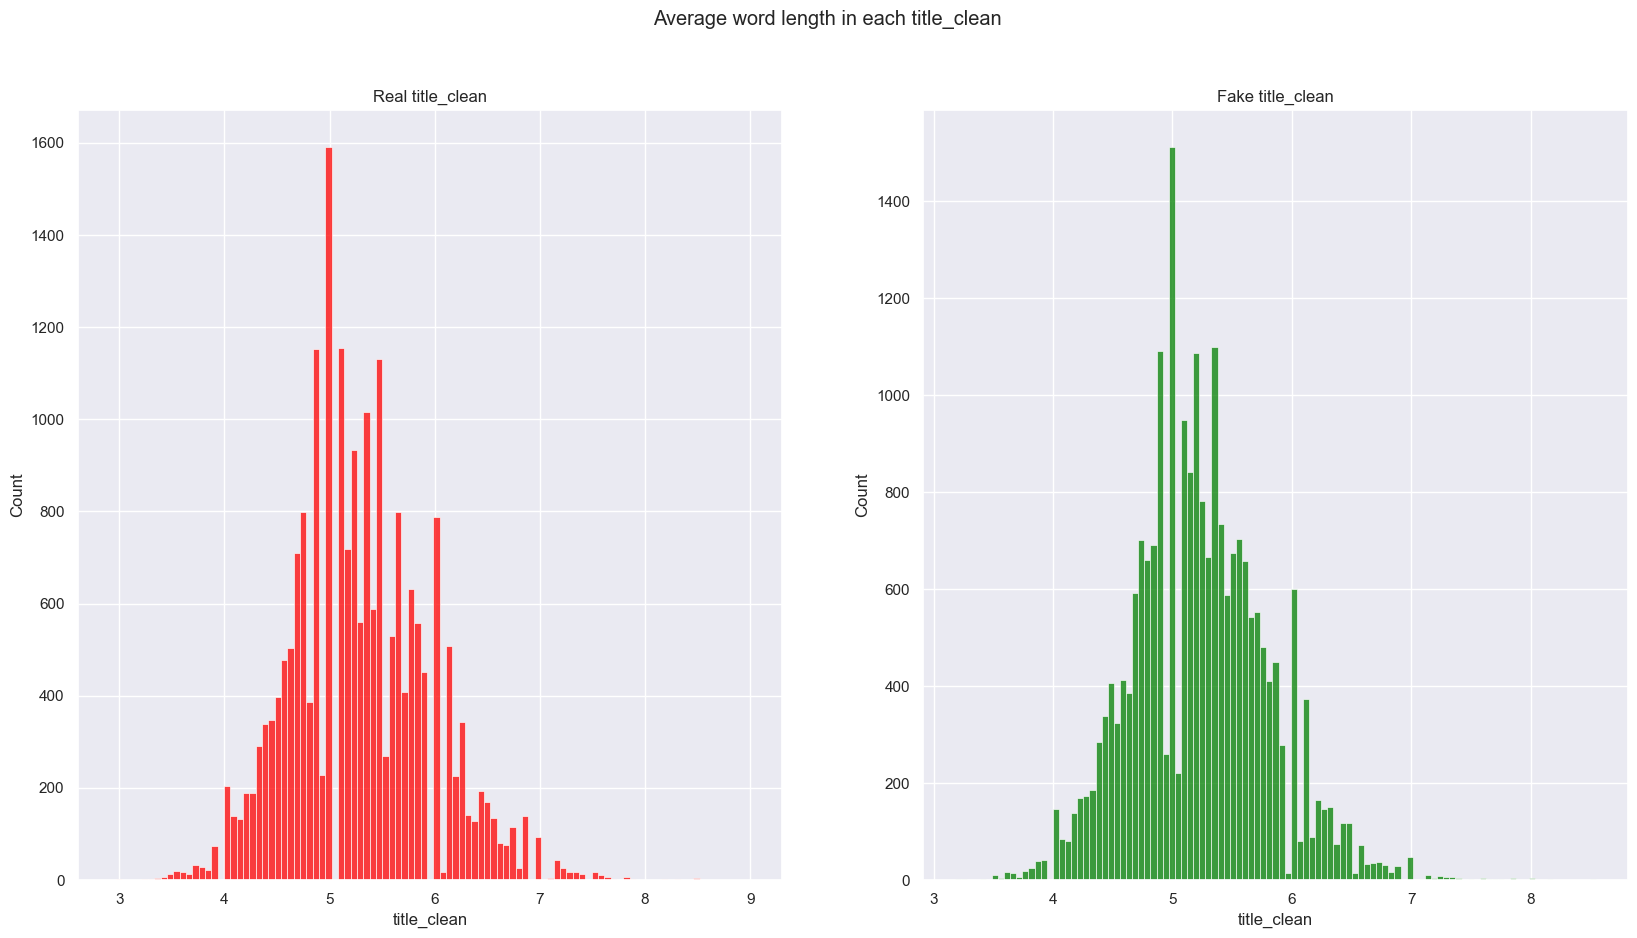

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data[data['label']==1]['title_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Real title_clean')
word=data[data['label']==0]['title_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake title_clean')
fig.suptitle('Average word length in each title_clean')

#### The average word length in both fake and real news titles appears to be quite similar, indicating that this feature might not be as useful for distinguishing between the two types of articles.

Text(0.5, 0.98, 'Average word length in each text_clean')

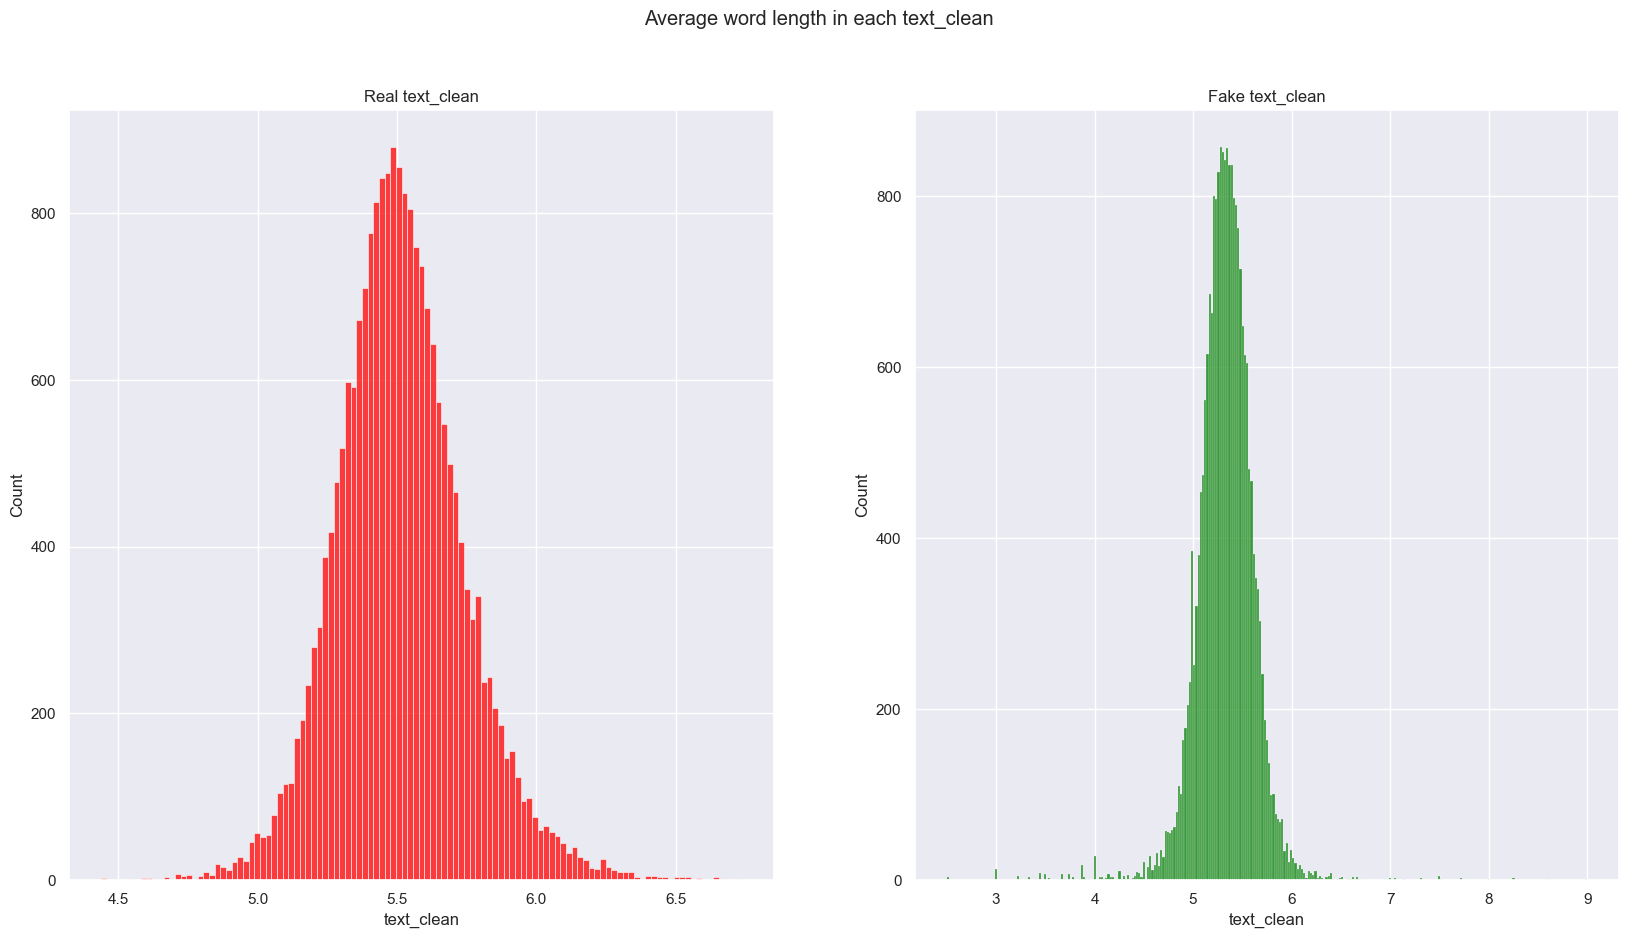

In [50]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data[data['label']==1]['text_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Real text_clean')
word=data[data['label']==0]['text_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text_clean')
fig.suptitle('Average word length in each text_clean')

#### The average word length in both fake and real news texts appears to be quite similar, indicating that this feature might not be as useful for distinguishing between the two types of articles.

## Unigram analysis for 'text_clean' and 'title_clean'

<Axes: >

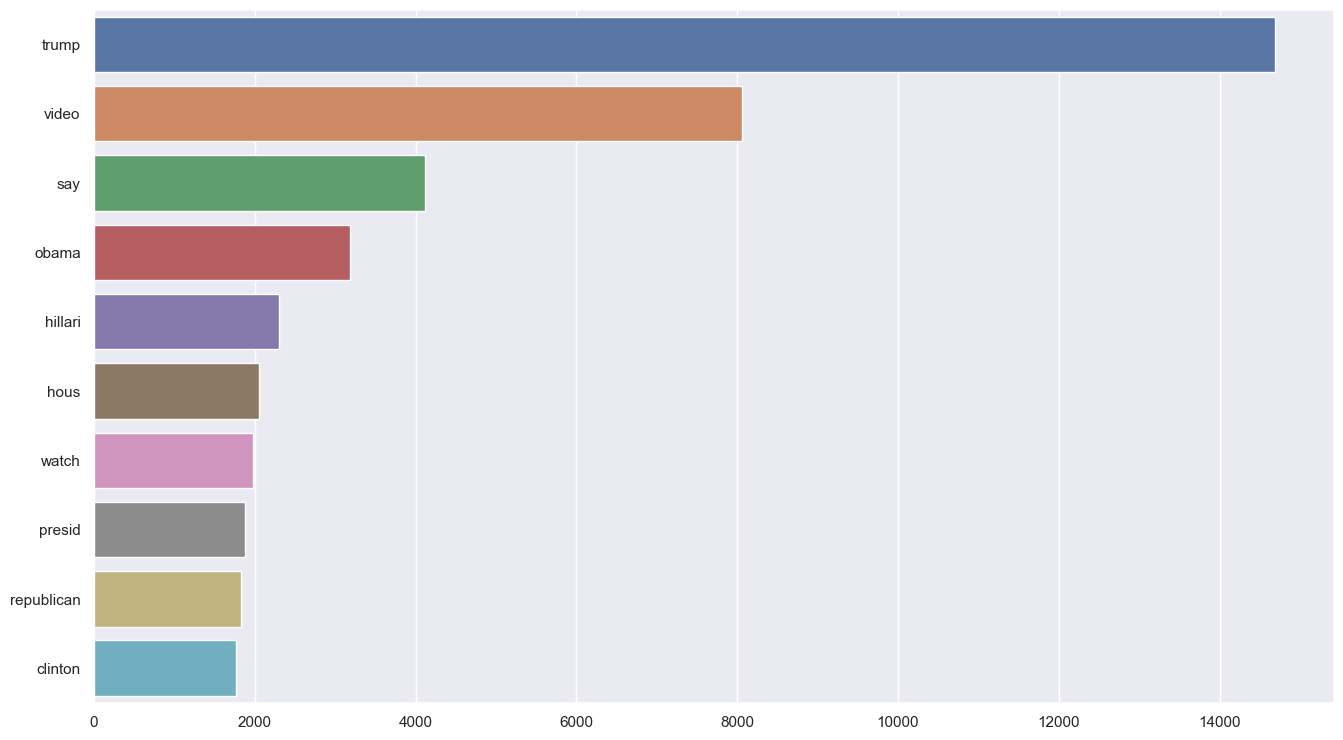

In [57]:
#title_clean
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data.title_clean,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

#### The most common unigrams in titles for both fake and real news articles include words like "trump", "video" and "say" which shows the prominence of politics and current events in news headlines.

<Axes: >

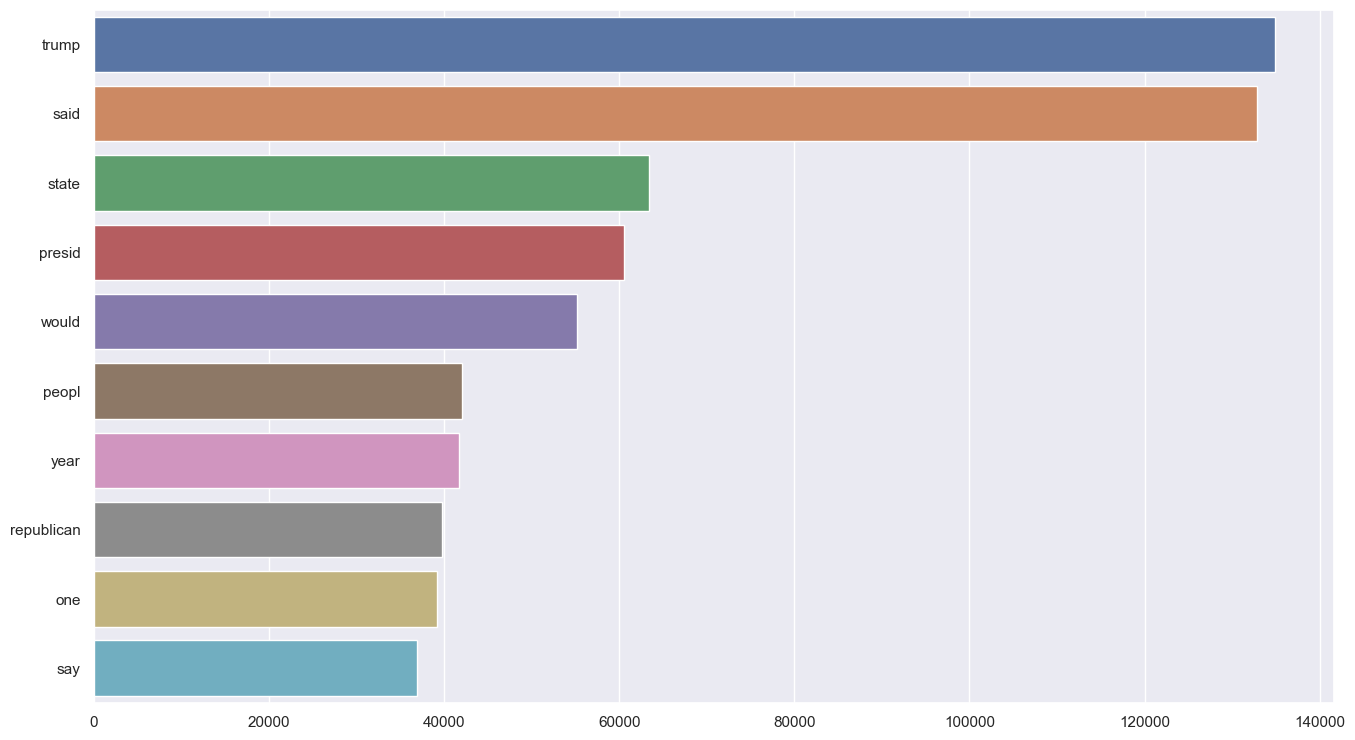

In [58]:
#text_clean
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data.text_clean,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

#### The most common unigrams in texts also include similar words suggesting that the content of both fake and real news articles revolves around similar themes.

## Bigram Analysis for 'text_clean' and 'title_clean'

<Axes: >

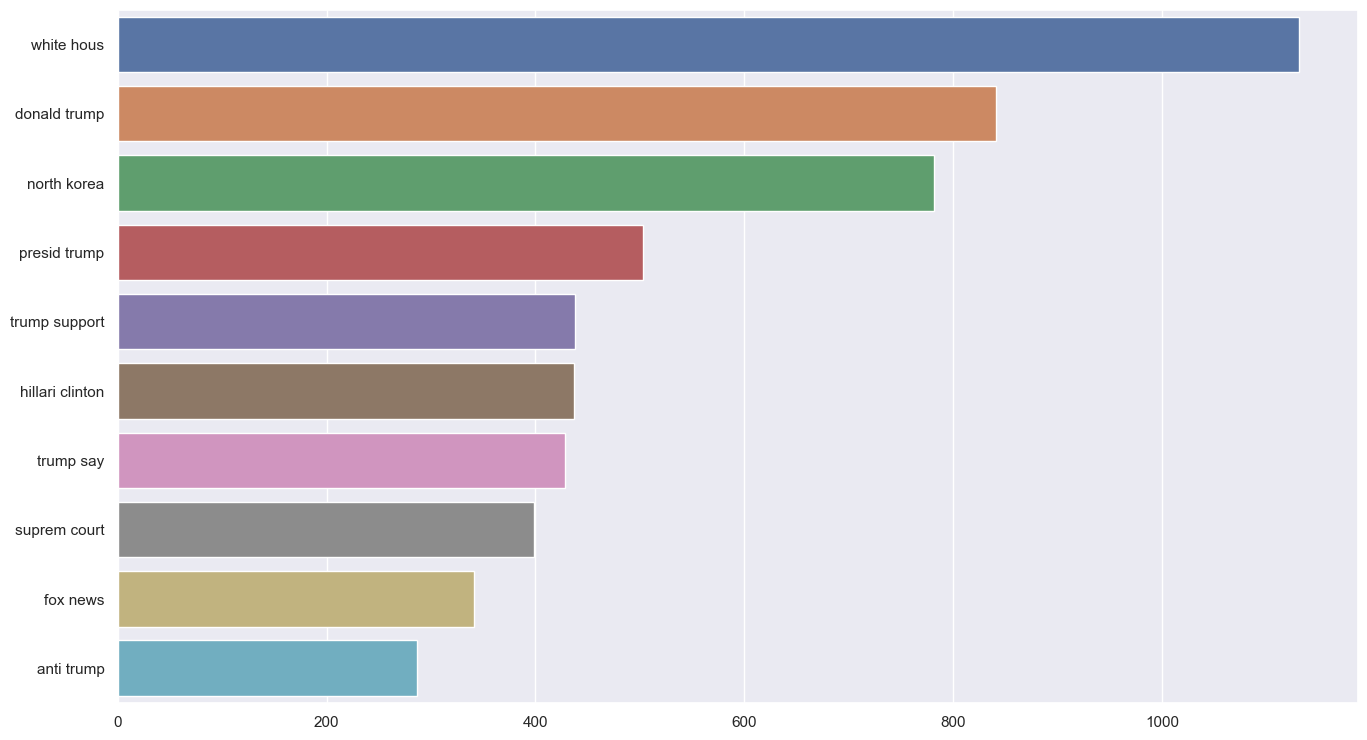

In [59]:
#title_clean
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(data.title_clean,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<Axes: >

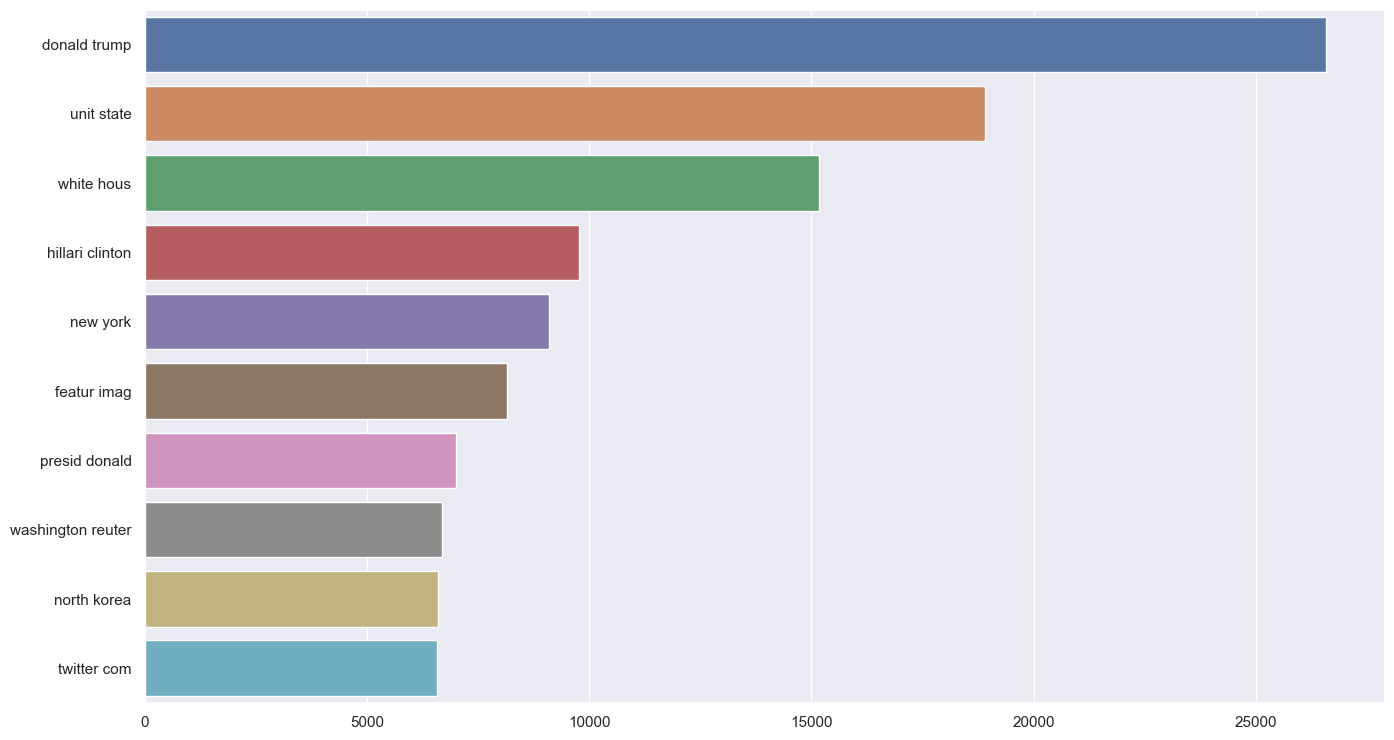

In [60]:
#text_clean
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(data.text_clean,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

#### It is interesting that the most common bigram in title is white house while the most common bigram in texts in donald trump

## Trigram Analysis for 'text_clean' and 'title_clean'

<Axes: >

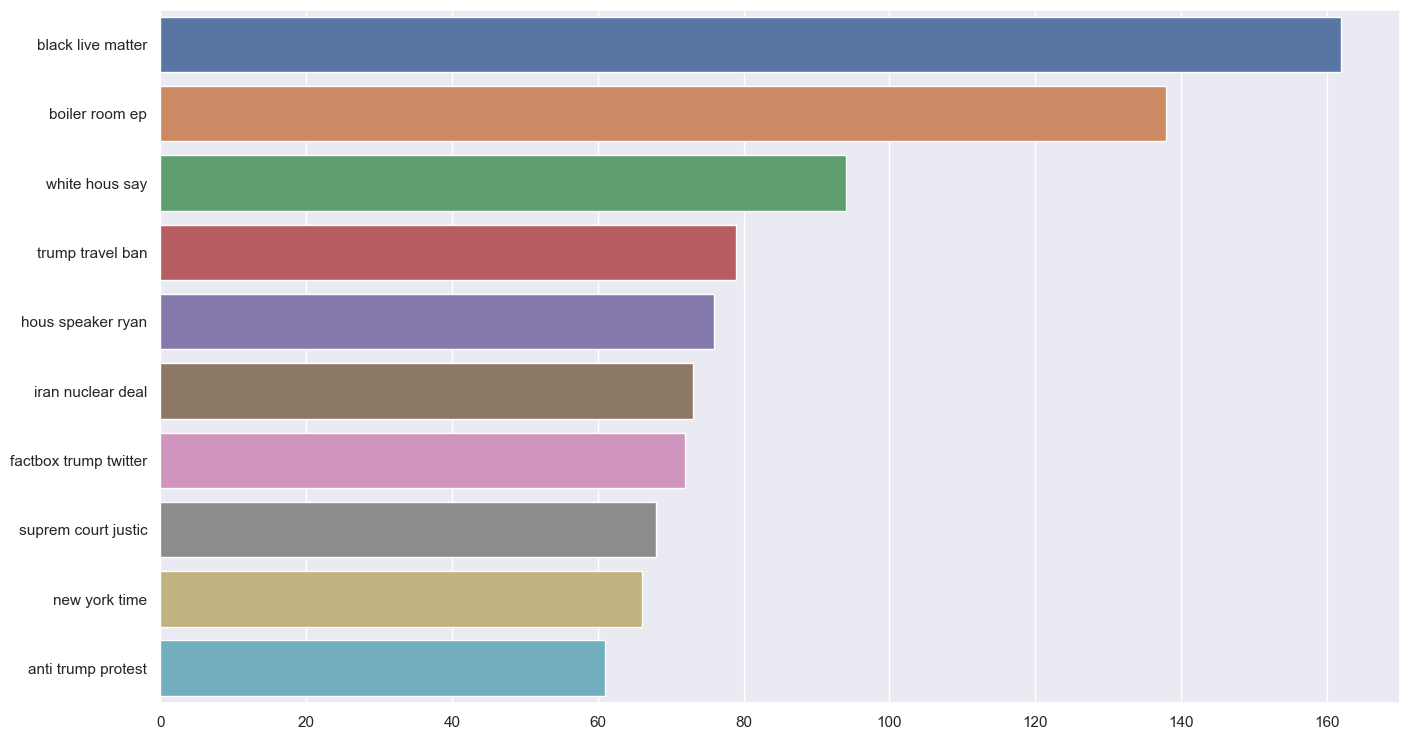

In [61]:
#title_clean
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(data.title_clean,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

<Axes: >

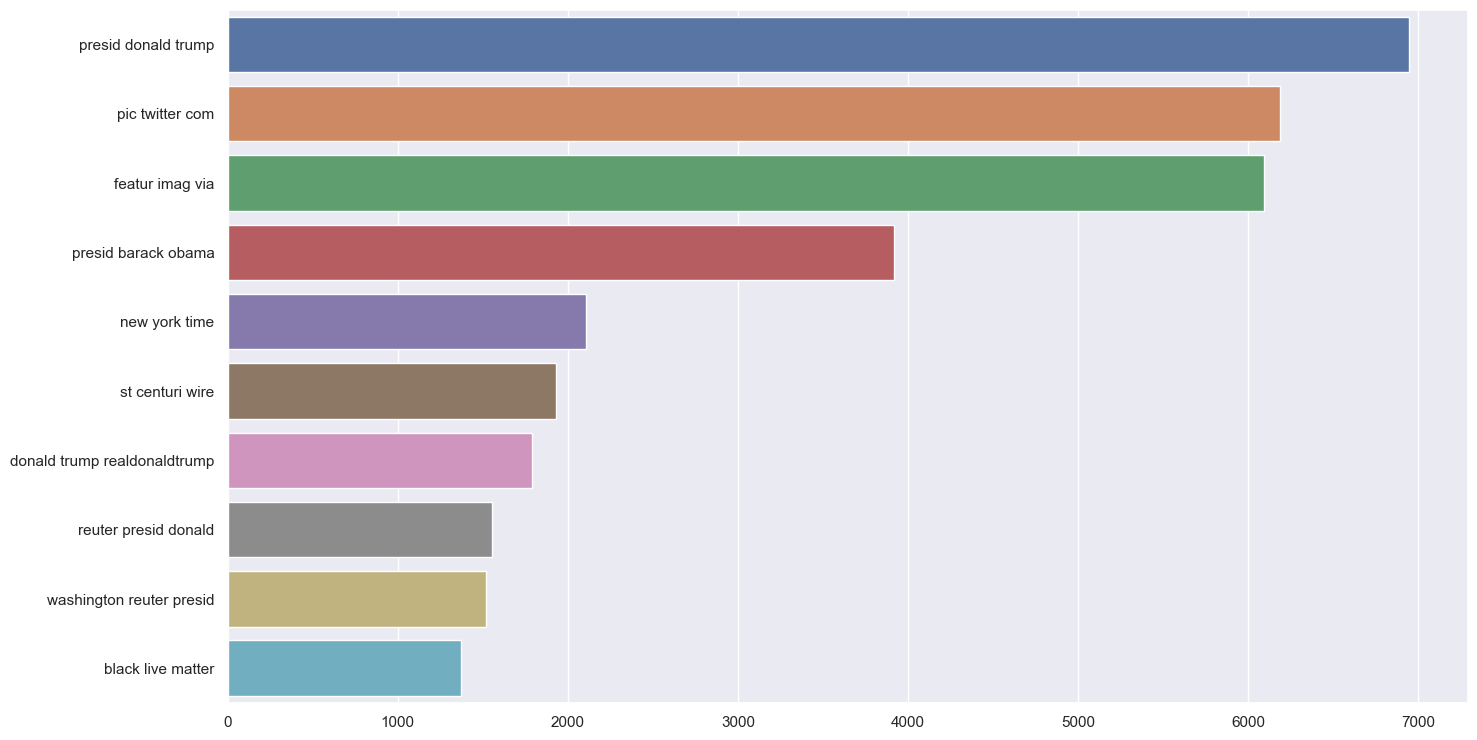

In [63]:
#text_clean
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(data.text_clean,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

#### As we progress from unigram to trigram, the difference in quantity increases drastically to more than x20.
#### We should realise that in texts, as words increases, they start to have meaning instead of random words like year and say.
#### Donald Trump is still prevalent in both titles and texts.

## Number of Real and Fake News Article overtime 

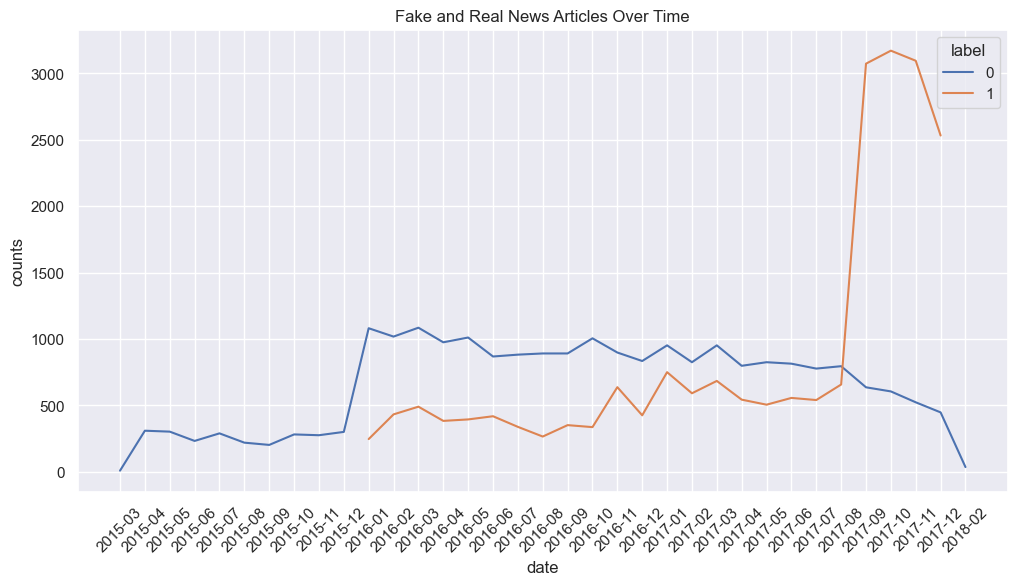

In [64]:
date_counts = data.groupby(['date', 'label']).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='counts', hue='label', data=date_counts)
plt.title('Fake and Real News Articles Over Time')
plt.xticks(rotation=45)
plt.show()

#### It can be seen in the graph that, in the recent years, there has been a drastic increase in fake news while real news decreases.
#### This goes to show how fake news can spread like wildfire easily and if not stopped, there will be serious implications.
#### It is imperative that we should prevent the spread of such fake news.